In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

The follow runs are for BCE loss with varying embed dims.

In [2]:
run = "logs/train/runs/2023-08-09_02-52-26"

In [3]:
metrics = f"D:\\felix-ml\\{run}\\csv\\version_0\\metrics.csv"
df = pd.read_csv(metrics)

In [4]:
df2 = df[~df["epoch"].isna()]
df2 = df2.drop(["step", "train/loss_step"], axis=1)
dfm = df2.melt("epoch", var_name="cols", value_name="loss")
dfm = dfm[~dfm["loss"].isna()]

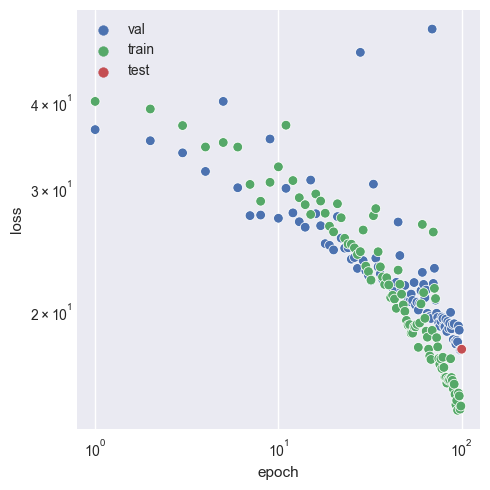

In [5]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

g = sns.scatterplot(data=dfm, x="epoch", y="loss", hue="cols", ax=ax)
ax.set_xscale("log")
ax.set_yscale("log")

handles, labels = g.get_legend_handles_labels()
for i in range(len(labels)):
    labels[i] = labels[i][: labels[i].find("/")]
g.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()